
#    311 Service Requests Data Analysis and Visualization
##   DATA 601 Project Report - Team 4 
###  Team Members : Anitha Joseph, Jincy Thomas, Megha Radhakrishnan Sanitha 


#### INTRODUCTION

    311 is a non-emergency government service that helps citizens to report issues and access city information. It can be accessed by phone, online, or through mobile apps and often includes multilingual support and services for vulnerable populations like the senior residents. The 311 system collects all requests, which are then routed to the responsible city department for resolution. It operates 24/7 and allows users to track the progress of their requests, ensuring transparency and accountability. Thus the 311 services make the lives of the residents easier and saves their time by eliminating the need to contact multiple departments for resolving their concerns. The user-friendly interface of 311 also makes the communication with the local government effortless, convenient and accessible for everyone.

    Analysis of 311 data over a long period of time helps us in determining the most frequent service requests which can be addressed more efficiently by allocating adequate resources. This can also be used to identify the efficiencies of different departments and the gaps where improvement is required. Seasonal patterns and long term trends can also be identified which can be used to predict the future demands and optimize the public services. By tracking types of requests, response times, and areas with frequent complaints, resources can be allocated more effectively, and operational inefficiencies can be identified and resolved. The residents will get a clear picture regarding the handling of their concerns which promotes transparency. Proactive planning is made possible, allowing for better resource distribution and improved service delivery. Ultimately, systemic issues can be identified, and solutions can be developed,leading to improved city planning and enhanced community satisfaction.


#### GUIDING QUESTIONS

    The major guiding questions for the analysis of 311 service requests and the the ways in which the insights from answering these questions can be utilized are as follows:
    1. Geographic Analysis
    ● Which community or location has the largest number of service requests?
    ● Are there any specific needs for certain areas?
    High need areas can be prioritized and resources can be allocated where they are most required.
    
    2. Seasonal Trends
    ● During which seasons do service requests occur most often?
    ● How do service requests change over seasons? Are there any identifiable patterns?
    Seasonal patterns are identified thus helping to focus resources effectively.
    
    3. Request Sources
    ● What is the primary source of service requests: phone calls or online submissions (web)?
    Interfaces can be upgraded based on user preferences.
    
    4. Types of Service Requests
    ● What is the service requested most frequently?
    Helps to identify and allocate adequate resources for the most needed service.
    
    5. Response Efficiency
    ● Which agency handles the most and least number of service requests?
    ● What is the average response rate and time for resolving for service requests?
    ● Who are the most efficient agents in terms of response and resolution times?
    ● How does the response efficiency vary across different years?
    Track the department efficiencies and identify areas where improvement is required.
    
    6. Trends Over Time
    ● How has the volume and type of service requests changed over the past five years?
    ● Are there noticeable trends in requests that could be used for future planning?
    Future demands can be anticipated, allowing for better preparedness.


#### DATASET

##### Data description

    The data for this analysis is sourced from The City of Calgary’s open data portal, specifically the "311 Service Requests -Services and Amenities" dataset (The City of Calgary,2025) . We have included public service requests submitted via 311 for 2 years- 2023 and 2024, consisting of 1062842 rows and 15 columns, structured in a tabular format. Each row represents an individual service request.
    
##### Format and Structure
    The data consists of several datasets depending on the city or organization's open data portal. Each dataset typically contains the following columns: 

    Column                Datatype   Description
    service_request_id     object    The unique identifier for an individual request.
    requested_date         object    The date the request was submitted.
    updated_date           object    The most recent date the request was updated.
    closed_date            object    The date the request was closed.
    status_description     object    The current status of the request (e.g. open, closed).
    source                 object    The channel used to submit the request
    service_name           object    The type of service requested.
    agency_responsible     object    The department responsible for this request.
    address               float64    The location of the service request (if applicable).
    comm_code              object    The community code associated with the service request location.
    comm_name              object    The community name associated with the service request location.
    location_type          object    The type of location information provided for this service request.
    longitude             float64    The longitude of the service request.
    latitude              float64    The latitude of the service request.
    point                  object    The spatial coordinates based on latitude and longitude.

    The data is sourced from The City of Calgary’s open data portal, 311 Service Requests - Services and Amenities.The data is publicly available and used with permission as per the open data policy. This data is provided by the City of Calgary at https://data.calgary.ca/Services-and-Amenities/311-Service-Requests/iahh-g8bj/about_data and all usagecomplies with their data usage and attribution requirements listed in the license URL https://data.calgary.ca/d/Open-Data-Terms/u45n-7awa .

In [90]:
# Installing and Importing libraries 

#!pip install geopandas

import numpy as np
import re
import pandas as pd
from tabulate import tabulate
import geopandas as gpd

import seaborn as sns

import matplotlib as mpl
import matplotlib.pyplot as plt

import plotly.express as px

from datetime import datetime
import pytz

import geopandas as gpd
import matplotlib.patches as mpatches
from shapely.geometry import Point, Polygon, MultiPolygon

from shapely import wkt

In [92]:
# Loading datasets

# 311_Service_Requests
df = pd.read_csv('/Users/jincythomas/Downloads/311_Service_Requests_2yrs.csv')

# Community Sectors
community_data=pd.read_csv("CSV_SECTORS.csv")

# Geographic data for geo-visualization
multi_polygon_gdf = pd.read_csv("Community_District_Boundaries_GeoJson.csv")

## Data cleaning nad preprocessing

Handling Missing and Unwanted Data

• Handling Missing Data: Drop columns with more than 10% missing values.

• Handling Unwanted Data: Drop requestes created before Jan-1-2023 and after Dec-31-2024.

• Handling Missing Community Code: Fill Community Code with Community name.

• Handling Missing Longitude: Fill Longitude with Median value.

• Handling Missing Latitude: Fill Latitude with median value.

• Handling Missing Point with it's mode value

• Replace values in 'source' column with corresponding service source

In [94]:
print("----------------------------------------------------------------------------")
print("\033[1m"+"Data Analysis and Visualization of Building Emergency Benchmarking"+"\033[0m")
print("----------------------------------------------------------------------------")

#display shape, columns, and data types
print("1.\tShape of the Dataset:", df.shape)
print("2.\tNumber of records or rows of the DataFrame:", df.shape[0])
print("3.\tColumns and Data types of each column:\n", df.dtypes)

----------------------------------------------------------------------------
Data Analysis and Visualization of Building Emergency Benchmarking
----------------------------------------------------------------------------
1.	Shape of the Dataset: (1093918, 15)
2.	Number of records or rows of the DataFrame: 1093918
3.	Columns and Data types of each column:
 service_request_id     object
requested_date         object
updated_date           object
closed_date            object
status_description     object
source                 object
service_name           object
agency_responsible     object
address               float64
comm_code              object
comm_name              object
location_type          object
longitude             float64
latitude              float64
point                  object
dtype: object


In [95]:
# Inspecting  data

missingDataSum = df.isna().sum()
missingDataPercentage = (df.isnull().mean() * 100).round(2)
missingData = pd.DataFrame({
    "Missing Count": missingDataSum,
    "Missing Percentage": missingDataPercentage
})

pd.options.display.float_format = '{:.2f}'.format
print("\n\033[1m"+"Missing Count per column:"+"\033[0m")
print(tabulate(missingData, headers='keys', tablefmt='fancy_grid'))

#The dataframe(DF) is copied to another DF variable if in case there is a need for original DF
originalDF = df
display(df.head(5))


Missing Count per column:
╒════════════════════╤═════════════════╤══════════════════════╕
│                    │   Missing Count │   Missing Percentage │
╞════════════════════╪═════════════════╪══════════════════════╡
│ service_request_id │     0           │                 0    │
├────────────────────┼─────────────────┼──────────────────────┤
│ requested_date     │     0           │                 0    │
├────────────────────┼─────────────────┼──────────────────────┤
│ updated_date       │     0           │                 0    │
├────────────────────┼─────────────────┼──────────────────────┤
│ closed_date        │ 39714           │                 3.63 │
├────────────────────┼─────────────────┼──────────────────────┤
│ status_description │     0           │                 0    │
├────────────────────┼─────────────────┼──────────────────────┤
│ source             │     0           │                 0    │
├────────────────────┼─────────────────┼──────────────────────┤
│ service_nam

,service_request_id,requested_date,updated_date,closed_date,status_description,source,service_name,agency_responsible,address,comm_code,comm_name,location_type,longitude,latitude,point
0,23-00000797,2023/01/02 12:00:00 AM,2023/01/10 12:00:00 AM,2023/01/10 12:00:00 AM,Closed,Other,Finance - ONLINE TIPP Agreement Request,CFOD - Finance,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,23-00001045,2023/01/02 12:00:00 AM,2024/01/11 12:00:00 AM,2024/01/11 12:00:00 AM,Closed,Other,Active Living Program Application,CS - Recreation and Social Programs,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,23-00001163,2023/01/02 12:00:00 AM,2023/01/06 12:00:00 AM,2023/01/06 12:00:00 AM,Closed,Phone,CN - Registered Social Worker Letter,CS - Calgary Neighbourhoods,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,23-00001191,2023/01/02 12:00:00 AM,2024/05/19 12:00:00 AM,2023/01/10 12:00:00 AM,Closed,Other,CT - Lost Property,OS - Calgary Transit,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,23-00001584,2023/01/02 12:00:00 AM,2023/01/04 12:00:00 AM,2023/01/04 12:00:00 AM,Closed,Other,Recreation - Arena Booking Application,CS - Calgary Recreation,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [96]:
# Handling Missing Data
columnNameDropped = missingDataPercentage[missingDataPercentage >= 40].index.tolist()
print("\nColumns with missing percentage more than 40% missing values are:", columnNameDropped)
df = df.drop(columns = missingDataPercentage[missingDataPercentage > 40].index)

# Handling Unwanted Data
beforeCount = df.shape[0]
df = df[(df['requested_date'] < '2025-01-01') & (df['requested_date'] > '2023-01-01')]
afterCount =df.shape[0]
deletedCount = beforeCount - afterCount
print(f"\nCount of deleted request which are recieved on or after 2025-01-01 and before 2023-01-01: {deletedCount}")

#Handling Missing Community Code
communityNames = df[df['comm_code'].isnull() & df['comm_name'].notnull()]['comm_name'].to_list()
print(f"\nCommunity name with community code null and community name exists: {communityNames}")

df['comm_code'].fillna(df['comm_name'])
print(f"\nCommunity Code is filled with Community name for {communityNames} community")

#Handling Missing Longitude and Latitude with their median 
df['longitude'] = df['longitude'].fillna(df['longitude'].median())
df['latitude'] = df['latitude'].fillna(df['latitude'].median())
print("\nLongitude and latitude missing values are replaced with its corresponding median")

#Handling Missing Point with the mode
df['point'] = df['point'].fillna(df['point'].mode()[0])
print("\nPoint missing values are replaced with its mode")

# Replace values in 'source' column with corresponding service source
df['source'] = df['source'].replace('Web', 'Web (Online Form)')
df['source'] = df['source'].replace('App', 'Mobile App')
df['source'] = df['source'].replace('Other','Email & Social Media')


Columns with missing percentage more than 40% missing values are: ['address']

Count of deleted request which are recieved on or after 2025-01-01 and before 2023-01-01: 31076

Community name with community code null and community name exists: ['05E']

Community Code is filled with Community name for ['05E'] community

Longitude and latitude missing values are replaced with its corresponding median

Point missing values are replaced with its mode


In [97]:
# Date and Time Handling:
#------------------------------------------------------------------------------------------

#Convert the Date column to a datetime object
df['requested_date'] = pd.to_datetime(df['requested_date'], format = '%Y/%m/%d %I:%M:%S %p')
df['updated_date'] = pd.to_datetime(df['updated_date'], format = '%Y/%m/%d %I:%M:%S %p')
df['closed_date'] = pd.to_datetime(df['closed_date'], format = '%Y/%m/%d %I:%M:%S %p')

print("\n\033[1m"+"Date and Time Handling: Modified data type:"+"\033[0m")
print(f"Data type of 'requested_date': {df['requested_date'].dtype}")
print(f"Data type of 'updated_date': {df['updated_date'].dtype}")
print(f"Data type of 'closed_date': {df['closed_date'].dtype}")

# Converting null values to NaT
df['closed_date'] = df['closed_date'].fillna(pd.NaT)

#Create new columns for the year, month, and day of the week for requested, updated and closed date columns
df['request_year'] = df['requested_date'].dt.year
df['request_month'] = df['requested_date'].dt.month
df['request_day'] = df['requested_date'].dt.day
df['update_year'] = df['updated_date'].dt.year
df['update_month'] = df['updated_date'].dt.month
df['update_day'] = df['updated_date'].dt.day
df['closed_year'] = df['closed_date'].dt.year
df['closed_month'] = df['closed_date'].dt.month
df['closed_day'] = df['closed_date'].dt.day

# Map the numerical days to their names for better readability
day_name_map = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
df['day_name'] = df['request_day'].map(day_name_map)

# Replacing null values in derived date related columns with 0 and converting the column values to int type
df.loc[df['closed_date'].isna(), ['closed_year', 'closed_month', 'closed_day']] = 0
df[['request_year', 'request_month', 'request_day']] = df[['request_year', 'request_month', 'request_day']].astype('Int32')
df[['update_year', 'update_month', 'update_day']] = df[['update_year', 'update_month', 'update_day']].astype('Int32')
df[['closed_year', 'closed_month', 'closed_day']] = df[['closed_year', 'closed_month', 'closed_day']].astype('Int32')


print("\n\033[1m"+"Date and Time Handling: newly created columns are:"+"\033[0m")
print("For requested_date: request_year, request_month, request_day")
print("For updated_date: update_year, update_month, update_day")
print("For closed_date: closed_year, closed_month, closed_day")


Date and Time Handling: Modified data type:
Data type of 'requested_date': datetime64[ns]
Data type of 'updated_date': datetime64[ns]
Data type of 'closed_date': datetime64[ns]

Date and Time Handling: newly created columns are:
For requested_date: request_year, request_month, request_day
For updated_date: update_year, update_month, update_day
For closed_date: closed_year, closed_month, closed_day


In [98]:
# Create additional columns:
#-------------------------------------------------------------------------

#Add a column indicating whether each request date falls on a weekend
df['is_weekend_request'] = df['request_day']>= 5

#Add a column for time duration to calculate the time took to close the request
df['response_time'] = df['closed_date'] - df['requested_date']
df['response_time'] = df['response_time'].dt.days

#Add a column to see if the request is duplicate or not(Yes means duplicate and No means not a duplicate request)
df['duplicate_request'] = df['status_description'].str.contains(r'Duplicate \(Closed\)', regex=True)
df['duplicate_request'] = df['duplicate_request'].replace({True: 'Yes', False: 'No'})

df['modified_status'] = df.apply(
   lambda row: 'Closed' if pd.notna(row['closed_date']) and row['status_description'] == 'Open'
    else ('Duplicate (Closed)' if pd.notna(row['closed_date']) and row['status_description'] == 'Duplicate (Open)'
          else row['status_description']), axis=1
)

print("\n\033[1m"+"Additional Columns created are:"+"\033[0m")
print("\tis_weekend_request")
print("\tresponse_time")
print("\tduplicate_request")


Additional Columns created are:
	is_weekend_request
	response_time
	duplicate_request


In [99]:
# Season Categorisation of "Requests"
# Defining Calgary's timezone
calgary_tz = pytz.timezone('America/Edmonton')  
# Exact UTC times for solstices and equinoxes (taken from Govt of Canada Website)
seasons_utc = {
    'Spring_2023': '2023-03-20 21:24:00',
    'Summer_2023': '2023-06-21 14:57:00',
    'Autumn_2023': '2023-09-23 06:50:00',
    'Winter_2023': '2023-12-22 03:27:00',
    'Spring_2024': '2024-03-20 03:06:00',
    'Summer_2024': '2024-06-20 20:50:00',
    'Autumn_2024': '2024-09-22 12:43:00',
    'Winter_2024': '2024-12-21 09:20:00'
}

# Converting the UTC times to Calgary local time
seasons = {}
for season, utc_time_str in seasons_utc.items():
    # Converting the UTC string into a datetime object   
    utc_time = datetime.strptime(utc_time_str, '%Y-%m-%d %H:%M:%S')
    utc_time = pytz.utc.localize(utc_time) 
    # Converting to Calgary local time
    local_time = utc_time.astimezone(calgary_tz)
    # Saving the result in the dictionary
    seasons[season] = local_time
#for key, value in seasons.items():
#print(f"{key}: {value.strftime('%Y-%m-%d %H:%M:%S')}")
#    print(f"{key}: {value}")

# Keeping the local time but making it aware for requested_date columns
if df['requested_date'].dt.tz is None:
    df['new_requested_date'] = df['requested_date'].dt.tz_localize('America/Edmonton')
#print(df['new_requested_date'].head())

# Categorizing into seasons and creating a new 'season' column
# Assigning seasons based on request date
def get_season(request_date):
    for season, season_date in seasons.items():
        if request_date < season_date:
            return season
    return 'Winter_2024'  # Default to the latest season

# Creating new season column 
df['Season'] = df['new_requested_date'].apply(get_season)

# Define the date range
start_date = '2023-12-22'
end_date = '2023-12-31'
# Update the Season column for the specified date range
df.loc[(df['requested_date'] >= start_date) & (df['requested_date'] <= end_date), 'Season'] = 'Winter_2023'
#display(df)

print("\n\033[1m"+"Additional Columns created are:"+"\033[0m")
print("\tnew_requested_date")


Additional Columns created are:
	new_requested_date


In [100]:
#Add column for Community Sector using the community sector csv file
def merge_community_sector(main_data, community_data):
    # Rename the relevant columns in the community_data for clarity and consistency
    community_data.rename(columns={'COMM_CODE': 'comm_code', 'SECTOR': 'community_sector'}, inplace=True)

    # Merge the datasets based on the 'comm_code'
    merged_data = main_data.merge(community_data[['comm_code', 'community_sector']], on='comm_code', how='left')

    return merged_data

df = merge_community_sector(df, community_data)
print("\n\033[1m"+"Additional Columns created are:"+"\033[0m")
print("\tcommunity_sector")

#Handling Missing for Community related columns
df.loc[df['comm_code'].isnull(), 'comm_code'] = "Community Centrepoint"
df.loc[df['comm_name'].isnull(), 'comm_name'] = "Community Centrepoint"
df.loc[df['community_sector'].isnull(), 'community_sector'] = "Community Centrepoint"

# Extract year and month from the requested_date column
df['year_month'] = df['requested_date'].dt.to_period('M')
display(df.info())


Additional Columns created are:
	community_sector
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1062919 entries, 0 to 1062918
Data columns (total 32 columns):
 #   Column              Non-Null Count    Dtype                           
---  ------              --------------    -----                           
 0   service_request_id  1062919 non-null  object                          
 1   requested_date      1062919 non-null  datetime64[ns]                  
 2   updated_date        1062919 non-null  datetime64[ns]                  
 3   closed_date         1030826 non-null  datetime64[ns]                  
 4   status_description  1062919 non-null  object                          
 5   source              1062919 non-null  object                          
 6   service_name        1062919 non-null  object                          
 7   agency_responsible  1062761 non-null  object                          
 8   comm_code           1062919 non-null  object                          


None

In [101]:
# Add a column for Divisions of Agency assigned for the requests

#Unassigned agencies are assigned to corresponding divisions
df.loc[df['agency_responsible'].isnull() & df['service_name'].str.contains('WATR -'), 'agency_responsible'] = 'UEP - Utilities & Environmental Protection'
df.loc[df['agency_responsible'].isnull() & df['service_name'].str.contains('PSD -'), 'agency_responsible'] = 'PDS - Planning & Development Services'
df.loc[df['agency_responsible'].isnull() & df['service_name'].str.contains('CPI -'), 'agency_responsible'] = 'OSC - Operational Services and Compliance'

# agency abbreviations are extracted
def extract_division(value):
    if pd.isna(value):
        return np.nan
    parts = value.split('-')
    resultStr = parts[0].strip() if '-' in value else value.strip()
    return resultStr


df['agency_division'] = df['agency_responsible'].apply(extract_division)

#Actual agencies or divisions under Calgary Government
agency_division = {
    'agency_name': ['Affiliated Organizations', 'Chief Financial Officer Department', 'Corporate Wide Service Requests',
                    'Calgary Police & Fire Services', 'Community Services', "Deputy City Manager's Office",
                   'Elected Officials', 'Fleet and Inventory', 'Information Services','Legal or Legislative Services',
                   'Office of the City Auditor','Operational Services and Compliance', 'Partnerships',
                   'Planning & Development Services','Project Information and Control Systems', 'Recreation and Social Programs',
                    'Transportation', 'Utilities & Environmental Protection'],
    'abbreviations': [['AO', 'Affiliated Organizations'], ['CFOD'], ['Corporate Wide Service Requests'], 
                      ['CPFS'],['CS'], ['DCMO'], 
                      ['Elected Officials'], ['Fleet and Inventory'], ['IS'], ['LL','LLSS'],
                      ['Office of the City Auditor'],['OS','OSC'],['Partnerships'],
                      ['PD','PDS'],['PICS'],['Recreation and Social Programs'],
                      ['TRAN','Tranc'], ['UEP','Uepc']]
}


# Create a mapping dictionary
mapping = {abbreviation: agency_name 
           for agency_name, abbreviations in zip(agency_division['agency_name'], agency_division['abbreviations']) 
           for abbreviation in abbreviations}


# Replace the agency_division values with actual agency_name or divisions
df['agency_division'] = df['agency_division'].map(mapping)
#noDivisionDF = df[df['agency_division'].isnull()]
#display(noDivisionDF)
agencies= df['agency_division'].unique()
    
# Iterate through each agency division in the list
for division in agencies:
    subset_df = df[df['agency_division'] == division]
    
    # Split the 'agency_responsible' column at the first hyphen and create 'agency_subdivision'
    df.loc[df['agency_division'] == division, 'agency_subdivision'] = subset_df['agency_responsible'].apply(
        lambda x: x.split('-', 1)[1] if '-' in x else division
    )

    # Split the 'service_name' column at the first hyphen and create 'service_category'
    df.loc[df['agency_division'] == division, 'service_category'] = subset_df['service_name'].apply(
        lambda x: x.split('-', 1)[0] if '-' in x else x
    )

    # Split the 'service_name' column at the first hyphen and create 'service_request'
    df.loc[df['agency_division'] == division, 'service_request'] = subset_df['service_name'].apply(
        lambda x: x.split('-', 1)[1] if '-' in x else x
    )
    
#Update Service Category names
df.loc[df['service_category'] == 'CT', 'service_category'] = 'Calgary Transit'
df.loc[df['service_category'] == 'DBBS Inspection', 'service_category'] = 'Development, Business and Building Services'
df.loc[df['service_category'] == 'WRS', 'service_category'] = 'Waste and Recycling Services'
df.loc[df['service_category'] == 'WATS', 'service_category'] = 'Water Services'
df.loc[df['service_category'] == 'Corporate', 'service_category'] = 'Corporate Wide Service Requests'


print("\n\033[1m"+"Additional Columns created are:"+"\033[0m")
print("\tagency_division")
print("\tagency_subdivision")
print("\tservice_category")
print("\tservice_request")



Additional Columns created are:
	agency_division
	agency_subdivision
	service_category
	service_request


In [102]:
#Filter the records from your dataframe df where closed_date is greater than or equal to requested_date,
#closed_date is not null, and duplicate_request is 'No'

print("\n\033[1m"+"Agency division and the count of requests handles by each division:"+"\033[0m")
efficiencyDF = df[(df['closed_date'] >= df['requested_date']) &
                 (df['closed_date'].notna()) &
                 (df['duplicate_request'] == 'No')]
print(f"For answering the response efficiency, we have considered {efficiencyDF.shape[0]} requests")

#The most and least request handled agencies
grouped_counts = efficiencyDF.groupby(['agency_division']).size().reset_index(name='count')
sorted_counts = grouped_counts.sort_values(by='count', ascending=False)
first_row = sorted_counts.head(1).to_string(index=False, header=False)
last_row = sorted_counts.tail(1).to_string(index=False, header=False)
print(f"The agency that handled the highest number of service requests and its count: {first_row}")
print(f"The agency that handled the lowest number of service requests and its count: {last_row}")
print("Agency division and the count of requests handles by each division is as given below:")
display(sorted_counts.head(6))

# Group by 'agency_division' and calculate the count of requests and average response time
print("\n\033[1m"+"Agency division, Count of requests and its efficiency:"+"\033[0m")
groupedEfficiencyDF = efficiencyDF.groupby('agency_division').agg(
    request_count=('service_request_id', 'size'),
    average_response_time=('response_time', 'mean')
).reset_index()
groupedEfficiencyDF['average_response_time'] = groupedEfficiencyDF['average_response_time'].round(2)
groupedEfficiencyDF = groupedEfficiencyDF.sort_values(by='average_response_time', ascending=True)
first_row = groupedEfficiencyDF.head(1).to_string(index=False, header=False)
last_row = groupedEfficiencyDF.tail(1).to_string(index=False, header=False)
print(f"The most efficient agency and its response time: {first_row}")
print(f"The least efficient agency and its response time: {last_row}")
print("Agency division, Count of requests and its efficiency in days:")
display(groupedEfficiencyDF)


# How does the response efficiency vary across different years
print("\n\033[1m"+"Response efficiency of Agency division over years:"+"\033[0m")
average_response_time_per_year = efficiencyDF.groupby('request_year').agg(
    request_count=('service_request_id', 'size'),
    average_response_time=('response_time', 'mean')
).reset_index()
average_response_time_per_year['average_response_time'] = average_response_time_per_year['average_response_time'].round(2)
average_response_time_per_year = average_response_time_per_year.sort_values(by='request_year', ascending=True)
print("Average response efficiency per year for all agency divisions:")
display(average_response_time_per_year)


# How the response efficiency vary across different years for each agency divisions
average_response_time_per_year_and_agency = efficiencyDF.groupby(['request_year', 'agency_division']).agg(
    request_count=('service_request_id', 'size'),
    average_response_time=('response_time', 'mean')
).reset_index()
average_response_time_per_year_and_agency['average_response_time'] = average_response_time_per_year_and_agency['average_response_time'].round(2)
average_response_time_per_year_and_agency = average_response_time_per_year_and_agency.sort_values(by=['request_year', 'agency_division'], ascending=True)
#display(average_response_time_per_year_and_agency)


pivoted_df = average_response_time_per_year_and_agency.pivot(index='agency_division', columns='request_year', values=['request_count', 'average_response_time'])
display(pivoted_df)



Agency division and the count of requests handles by each division:
For answering the response efficiency, we have considered 1021777 requests
The agency that handled the highest number of service requests and its count: Operational Services and Compliance 440192
The agency that handled the lowest number of service requests and its count: Fleet and Inventory 4
Agency division and the count of requests handles by each division is as given below:


,agency_division,count
11,Operational Services and Compliance,440192
3,Community Services,263103
13,Planning & Development Services,108347
1,Calgary Police & Fire Services,92937
17,Utilities & Environmental Protection,34544
16,Transportation,29860



Agency division, Count of requests and its efficiency:
The most efficient agency and its response time: Elected Officials 364 0.01
The least efficient agency and its response time: Operational Services and Compliance 440192 15.53
Agency division, Count of requests and its efficiency in days:


,agency_division,request_count,average_response_time
6,Elected Officials,364,0.01
10,Office of the City Auditor,4,1.75
4,Corporate Wide Service Requests,4970,2.04
17,Utilities & Environmental Protection,34544,3.98
9,Legal or Legislative Services,2798,4.21
1,Calgary Police & Fire Services,92937,4.78
16,Transportation,29860,4.85
14,Project Information and Control Systems,14110,5.03
2,Chief Financial Officer Department,21881,5.39
5,Deputy City Manager's Office,537,5.88



Response efficiency of Agency division over years:
Average response efficiency per year for all agency divisions:


,request_year,request_count,average_response_time
0,2023,535281,14.40
1,2024,486496,10.62


request_count            \
request_year                                     2023      2024   
agency_division                                                   
Affiliated Organizations                        62.00     58.00   
Calgary Police & Fire Services               50364.00  42573.00   
Chief Financial Officer Department           21881.00       NaN   
Community Services                          130296.00 132807.00   
Corporate Wide Service Requests               2191.00   2779.00   
Deputy City Manager's Office                   537.00       NaN   
Elected Officials                              192.00    172.00   
Fleet and Inventory                              4.00       NaN   
Information Services                          1677.00   3260.00   
Legal or Legislative Services                 1288.00   1510.00   
Office of the City Auditor                       3.00      1.00   
Operational Services and Compliance         178617.00 261575.00   
Partnerships                                    40.00       NaN   
Planning & Development Services              75282.00  33065.00   
Project Information and Control Systems       5545.00   8565.00   
Recreation and Social Programs                3029.00       NaN   
Transportation                               29729.00    131.00   
Utilities & Environmental Protection         34544.00       NaN   

                                        average_response_time        
request_year                                             2023  2024  
agency_division                                                      
Affiliated Organizations                                10.63 15.12  
Calgary Police & Fire Services                           5.57  3.84  
Chief Financial Officer Department                       5.39   NaN  
Community Services                                      16.21 14.70  
Corporate Wide Service Requests                          2.68  1.54  
Deputy City Manager's Office                             5.88   NaN  
Elected Officials                                        0.01  0.02  
Fleet and Inventory                                     14.25   NaN  
Information Services                                    20.26  8.61  
Legal or Legislative Services                            4.47  3.98  
Office of the City Auditor                               1.67  2.00  
Operational Services and Compliance                     23.74  9.92  
Partnerships                                             9.10   NaN  
Planning & Development Services                          7.72 10.92  
Project Information and Control Systems                  2.97  6.36  
Recreation and Social Programs                           9.69   NaN  
Transportation                                           4.85  5.61  
Utilities & Environmental Protection                     3.98   NaN

## Information of New Processed Data Set for 311 requests

• Shape of the new Processed Dataset.

• Count of 311 service requests.

• Columns and Data types of each column.

• 311 Request 'Status' available.

• Agencies resposible for handling service requests.

• Count of all distinct service requests.

• Count of all distinct service requests for all agencies.

In [161]:
print("1.\tShape of the new Processed Dataset:", df.shape)
print("2.\tCount of 311 service requests:", df.shape[0])
print("3.\tColumns and Data types of each column:")

# Get the columns that are in df but not in originalDF
newColumns = list(set(df.columns) - set(originalDF.columns))
dtypes = df[newColumns].dtypes
width = max(len(column) for column in df.columns) + 2
for column, dtype in dtypes.items():
    print(f"\t\t{column.ljust(width)}{dtype}")
print(f"4.\t311 Request Status available: {df['status_description'].unique()}")
#display(df['status_description'].unique())

status_counts = df['status_description'].value_counts()
print(status_counts)
dupClosedReqCnt = status_counts['Duplicate (Closed)']
dupOpenReqCnt = status_counts['Duplicate (Open)']
closedReqCnt = status_counts['Closed']
openReqCnt = status_counts['Open']
print(f"\ti.\tCount of Open requests: {openReqCnt}")

# Filter requests where status_description is "open" but has closed date
openButClosedDF = df[(df['status_description'] == 'Open') & (df['closed_date'].notnull())]
openReqWithClosedDateCnt = openButClosedDF['status_description'].value_counts()
print(f"\t\ta.\tCount of Open requests with closed date: {openReqWithClosedDateCnt['Open']}")
openDF = df[(df['status_description'] == 'Open') & (df['closed_date'].isnull())]
openDF = openDF['status_description'].value_counts()
print(f"\t\tb.\tCount of Open requests with no closed date: {openDF['Open']}")

print(f"\tii.\tCount of Closed requests: {closedReqCnt}")
print(f"\tiii.\tCount of Duplicate (Open) requests: {dupOpenReqCnt}")
print(f"\tiv.\tCount of Duplicate (Closed) requests: {dupClosedReqCnt}")

# Inspect data
missingDataSum = df.isna().sum()
missingDataPercentage = (df.isnull().mean() * 100).round(2)
missingData = pd.DataFrame({
    "Missing Count": missingDataSum,
    "Missing Percentage": missingDataPercentage
})

pd.options.display.float_format = '{:.2f}'.format
print("\n\033[1m"+"Missing Count per column:"+"\033[0m")
print(tabulate(missingData, headers='keys', tablefmt='fancy_grid'))


1.	Shape of the new Processed Dataset: (1062919, 36)
2.	Count of 311 service requests: 1062919
3.	Columns and Data types of each column:
		update_month        Int32
		is_weekend_request  boolean
		service_category    object
		request_year        Int32
		request_day         Int32
		day_name            object
		agency_division     object
		agency_subdivision  object
		Season              object
		new_requested_date  datetime64[ns, America/Edmonton]
		response_time       float64
		update_day          Int32
		year_month          period[M]
		community_sector    object
		modified_status     object
		closed_month        Int32
		closed_day          Int32
		closed_year         Int32
		request_month       Int32
		duplicate_request   object
		update_year         Int32
		service_request     object
4.	311 Request Status available: ['Closed' 'Open' 'Duplicate (Closed)' 'Duplicate (Open)']
status_description
Closed                1019748
Open                    32782
Duplicate (Closed)       9049
Dup

In [107]:
# Entire Unique service names
unique_service_name_df = df['service_name'].unique()
print("\n5.\tCount of all distinct service requests:",len(unique_service_name_df))

agency_vise_distinct_req = df[['agency_division','agency_subdivision', 'agency_responsible','service_name']].drop_duplicates()
print("\n6.\tCount of all distinct service requests for all agencies:",len(agency_vise_distinct_req))

#agencies= df['agency_division'].unique()
print("\n7.\tAgencies resposible for handling service requests are:")
for agency in agencies:
    print(f"\t\t- {agency}")


5.	Count of all distinct service requests: 638

6.	Count of all distinct service requests for all agencies: 1037

7.	Agencies resposible for handling service requests are:
		- Chief Financial Officer Department
		- Community Services
		- Operational Services and Compliance
		- Transportation
		- Utilities & Environmental Protection
		- Planning & Development Services
		- Calgary Police & Fire Services
		- Corporate Wide Service Requests
		- Project Information and Control Systems
		- Partnerships
		- Deputy City Manager's Office
		- Legal or Legislative Services
		- Recreation and Social Programs
		- Elected Officials
		- Information Services
		- Affiliated Organizations
		- Fleet and Inventory
		- Office of the City Auditor


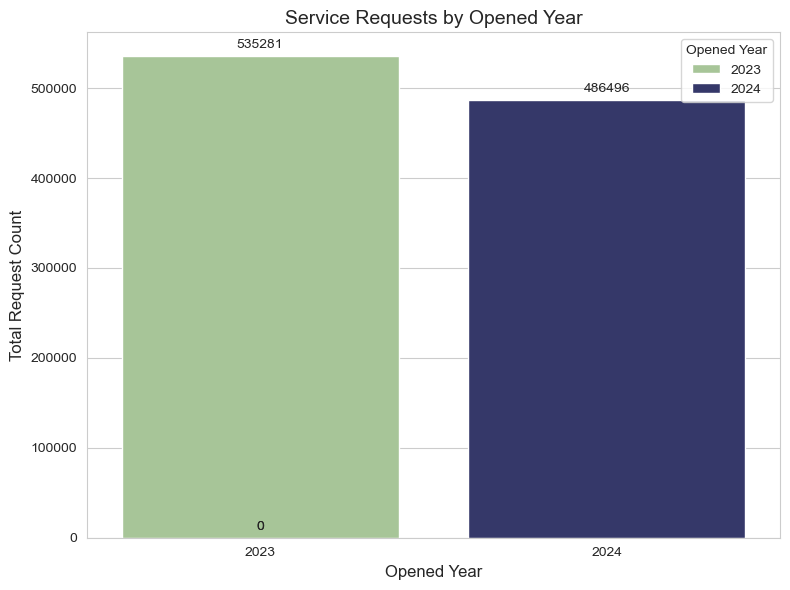

In [108]:
#Requests by year
requests_by_year = efficiencyDF.groupby('request_year')['service_request_id'].count().reset_index()
requests_by_year.columns = ['Opened Year', 'Total Request Count']
plt.figure(figsize=(8, 6))
bar_plot = sns.barplot(data=requests_by_year, x='Opened Year', y='Total Request Count', palette='crest', hue = 'Opened Year')
# Adding the y-values on top of each bar
for bar in bar_plot.patches:
    bar_plot.annotate(format(bar.get_height(), '.0f'), 
                      (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                      ha='center', va='center', 
                      size=10, xytext=(0, 8), 
                      textcoords='offset points')
plt.title('Service Requests by Opened Year', fontsize=14)
plt.xlabel('Opened Year', fontsize=12)
plt.ylabel('Total Request Count', fontsize=12)
plt.tight_layout()
plt.show()

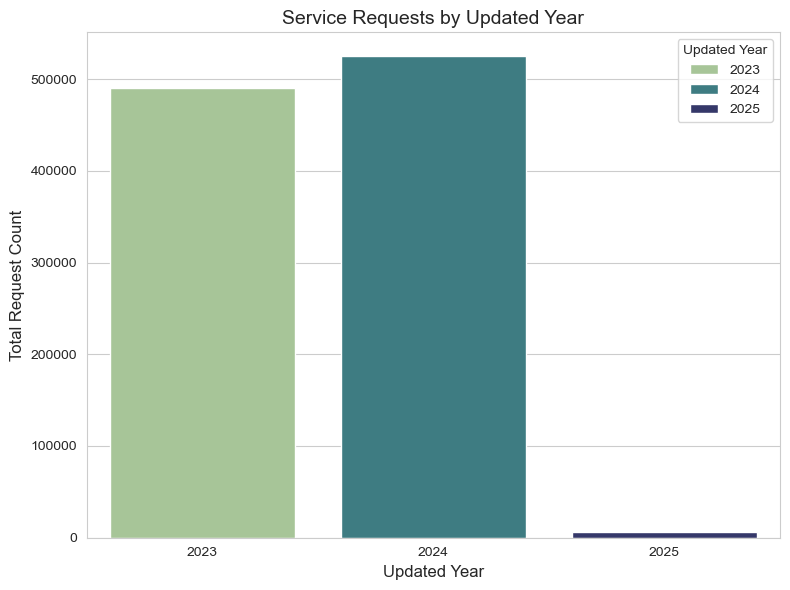

In [109]:
# Updated requests by year

requests_by_year = efficiencyDF.groupby('update_year')['service_request_id'].count().reset_index()
requests_by_year.columns = ['Updated Year', 'Total Request Count']
plt.figure(figsize=(8, 6))
sns.barplot(data=requests_by_year, x='Updated Year', y='Total Request Count', palette='crest', hue='Updated Year')
plt.title('Service Requests by Updated Year', fontsize=14)
plt.xlabel('Updated Year', fontsize=12)
plt.ylabel('Total Request Count', fontsize=12)
plt.tight_layout()
plt.show()

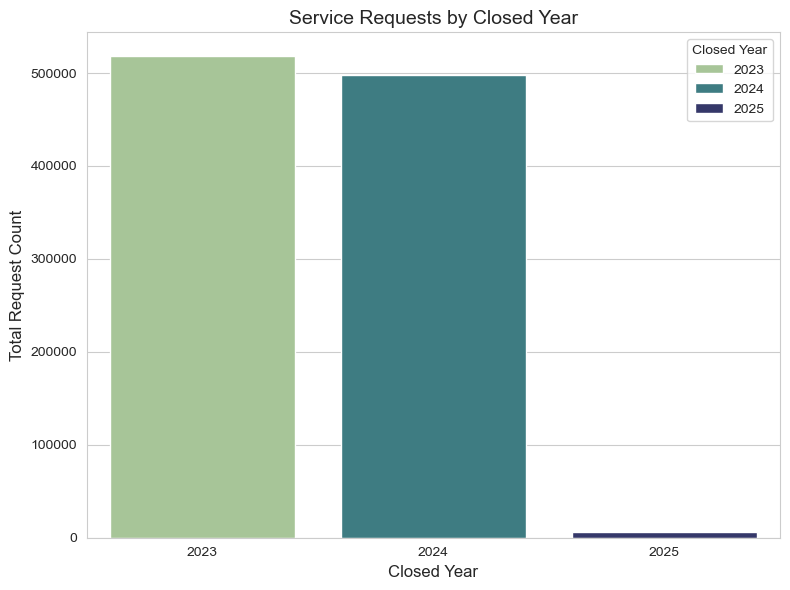

In [110]:
# Closed requests by year

requests_by_year = efficiencyDF.groupby('closed_year')['service_request_id'].count().reset_index()
requests_by_year.columns = ['Closed Year', 'Total Request Count']
plt.figure(figsize=(8, 6))
sns.barplot(data=requests_by_year, x='Closed Year', y='Total Request Count', palette='crest', hue = 'Closed Year')
plt.title('Service Requests by Closed Year', fontsize=14)
plt.xlabel('Closed Year', fontsize=12)
plt.ylabel('Total Request Count', fontsize=12)
plt.tight_layout()
plt.show()

## Answering guiding questions¶

1. Which community has the largest and smallest number of service requests?
2. Are there any specific needs for certain areas?
3. What is the service requested most frequently?
4. During which seasons do service requests occur most often? Are there any identifiable patterns?
5. How does the response efficiency vary across different years?
6. Which agency handles the most and least number of service requests?
7. What is the average response rate and time for resolving service requests?
8. How has the volume and type of service requests changed over the past five years?
9. Which are the unique 311 request sources?
10. What differences are observed in the volume of service requests between weekends and weekdays?
11. Which service categories are popular and  Identify how  the most common service categories and how they vary over time?
12. How do response times vary across different service categories? 
13. Which service categories present potential bottlenecks?

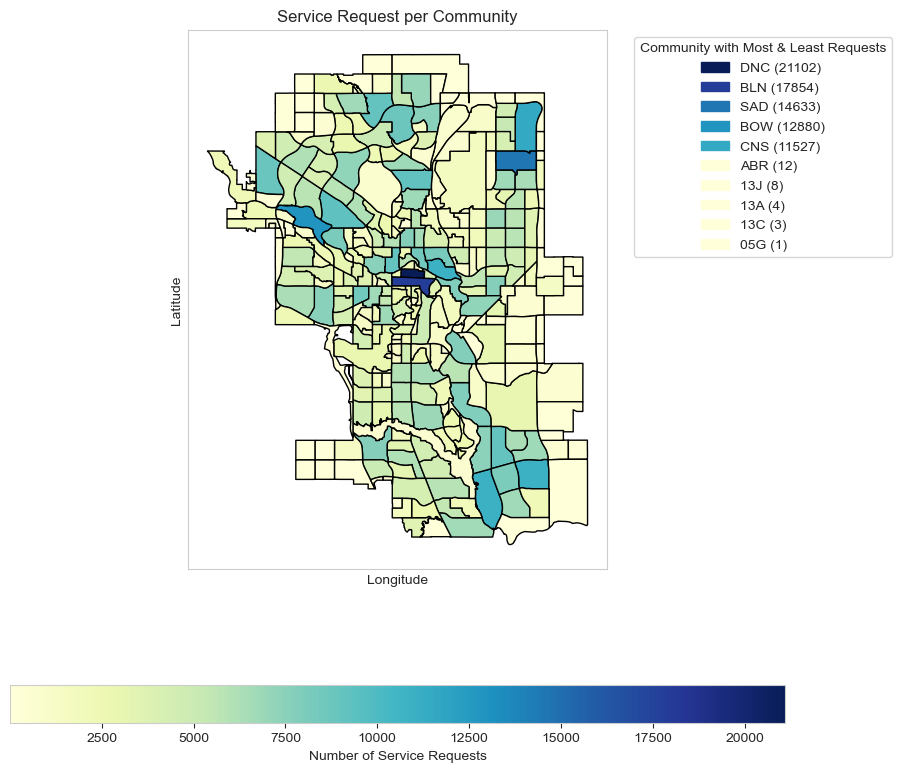

In [113]:
# Identifying community with the largest and smallest number of service requests

# Copying dataset for safety
main_df=df.copy()
service_request_counts = main_df.groupby('comm_code')['service_request_id'].count().reset_index()
service_request_counts.columns = ['comm_code', 'service_request_count']
multi_polygon_gdf = multi_polygon_gdf.rename(columns={'COMM_CODE': 'comm_code'})
merged_gdf = multi_polygon_gdf.merge(service_request_counts, on='comm_code', how='left')
merged_gdf = merged_gdf.sort_values(by='service_request_count', ascending=False)

merged_gdf['MULTIPOLYGON'] = merged_gdf['MULTIPOLYGON'].apply(wkt.loads)

merged_gdf = gpd.GeoDataFrame(merged_gdf, geometry='MULTIPOLYGON')
merged_gdf = merged_gdf.set_crs("EPSG:4326")

largest_community = merged_gdf.iloc[0]
smallest_community = merged_gdf.iloc[-1]
fig, ax = plt.subplots(figsize=(10, 10))

merged_gdf.plot(ax=ax, column='service_request_count', cmap='YlGnBu', edgecolor='black', legend=True,
                legend_kwds={'label': "Number of Service Requests", 'orientation': "horizontal"})

legend_patches = []
for idx, row in pd.concat([merged_gdf.head(5), merged_gdf.tail(5)]).iterrows():
    color = plt.cm.YlGnBu(row['service_request_count'] / merged_gdf['service_request_count'].max())
    legend_patches.append(mpatches.Patch(color=color, label=f"{row['comm_code']} ({row['service_request_count']})"))

ax.legend(handles=legend_patches, title="Community with Most & Least Requests", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

ax.set_title('Service Request per Community')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_xticks([])
ax.set_yticks([])
plt.show()

In [114]:
# Identify specific needs for certain areas
service_request_counts = main_df.groupby(['community_sector', 'service_category'])['service_request_id'].count().reset_index()
service_request_counts.columns = ['Community Sector', 'Service Category', 'Request Count']
service_request_counts = service_request_counts.sort_values(by='Request Count', ascending=False)
max_request_per_sector = service_request_counts.loc[service_request_counts.groupby('Community Sector')['Request Count'].idxmax()]
print(max_request_per_sector[['Community Sector', 'Service Category', 'Request Count']])

          Community Sector Service Category  Request Count
59                  CENTRE           Roads           48820
130  Community Centrepoint      Recreation           16353
191                   EAST           Roads            8234
256                  NORTH           Roads           15816
322              NORTHEAST           Roads           22970
391              NORTHWEST           Roads           21423
462                  SOUTH           Roads           29746
540              SOUTHEAST             WRS           15903
596                   WEST           Roads           15203


   Service Category  Request Count
72           Roads          179044


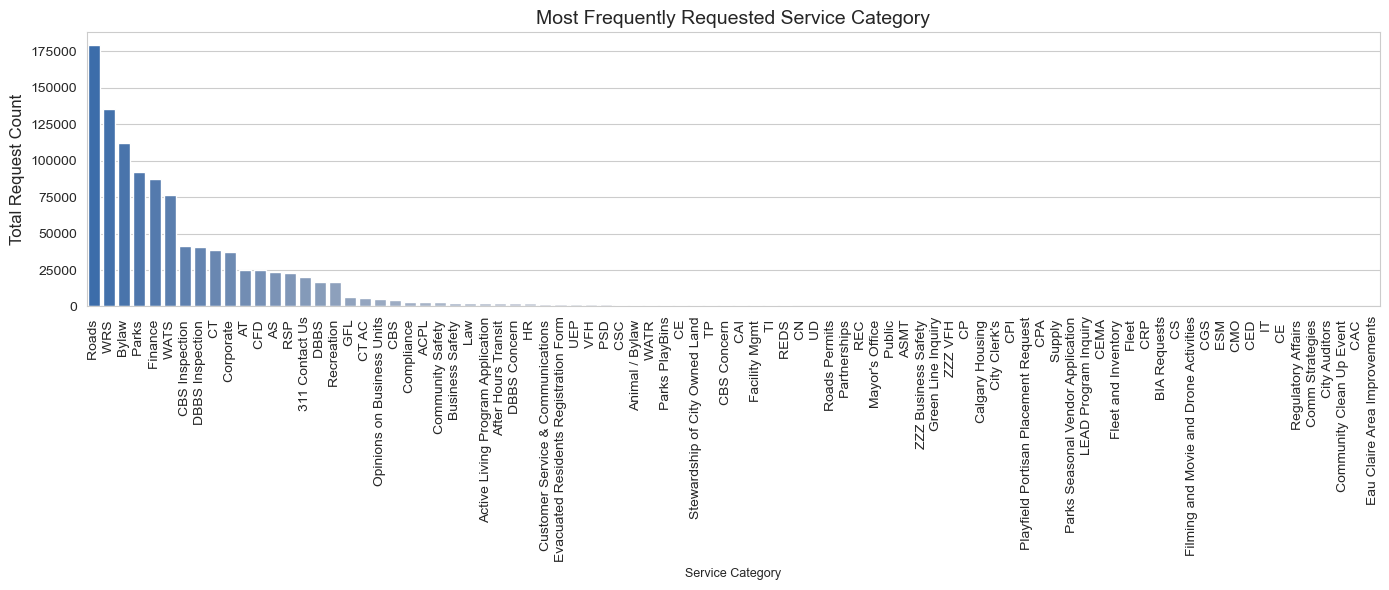

In [116]:
#Find the service requested most frequently
most_frequent_service = service_request_counts.groupby('Service Category')['Request Count'].sum().reset_index()
most_frequent_service = most_frequent_service.sort_values(by='Request Count', ascending=False)
print(most_frequent_service.head(1))
plt.figure(figsize=(14, 6))
sns.barplot(data=most_frequent_service, x='Service Category', y='Request Count',hue='Service Category', palette='vlag')
plt.title('Most Frequently Requested Service Category', fontsize=14)
plt.xlabel('Service Category', fontsize=9)
plt.ylabel('Total Request Count', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

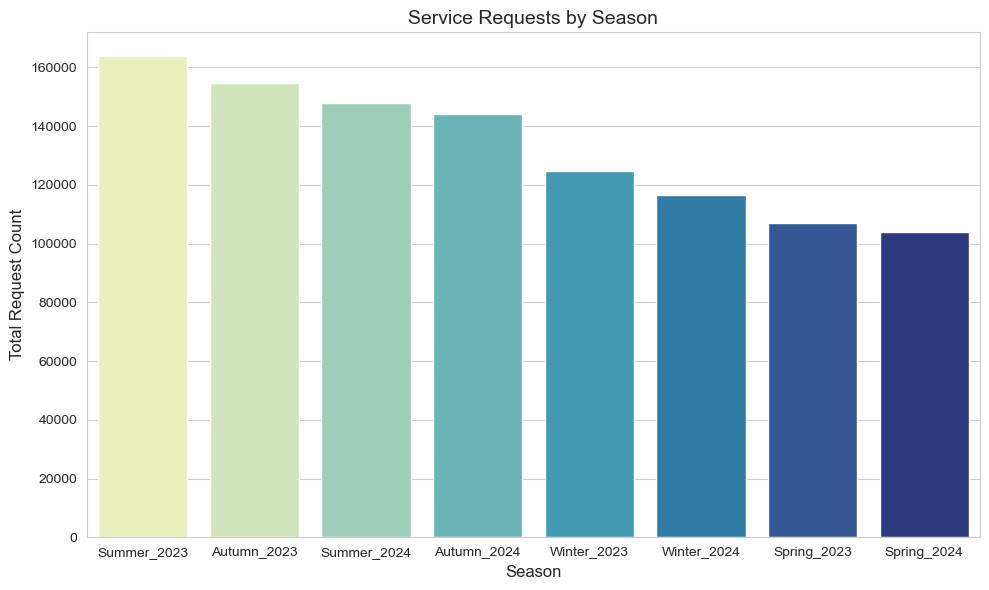

In [117]:
# Finding seasons withn maximum number of service requests 
seasonal_requests = main_df.groupby('Season')['service_request_id'].count().reset_index()
seasonal_requests.columns = ['Season', 'Total Request Count']
seasonal_requests = seasonal_requests.sort_values(by='Total Request Count', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(data=seasonal_requests, x='Season', y='Total Request Count',hue='Season', palette='YlGnBu')
plt.title('Service Requests by Season', fontsize=14)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Total Request Count', fontsize=12)
plt.tight_layout()
plt.show()

Interpertation:
High request season: Summer 2023
Low request season: Spring 2023
TREND:

Both 2023 and 2024 Summer have the highest service requests.
Second: Autum 2023 and 2024, drop from 2023 to 2024.
Winter shows similar
The least number of service requests in Spring
Decreasing trend over the years: We see a slight drop in the number of requests from 2023 to 2024 across most seasons

In [119]:
#Find response efficiency vary across different years

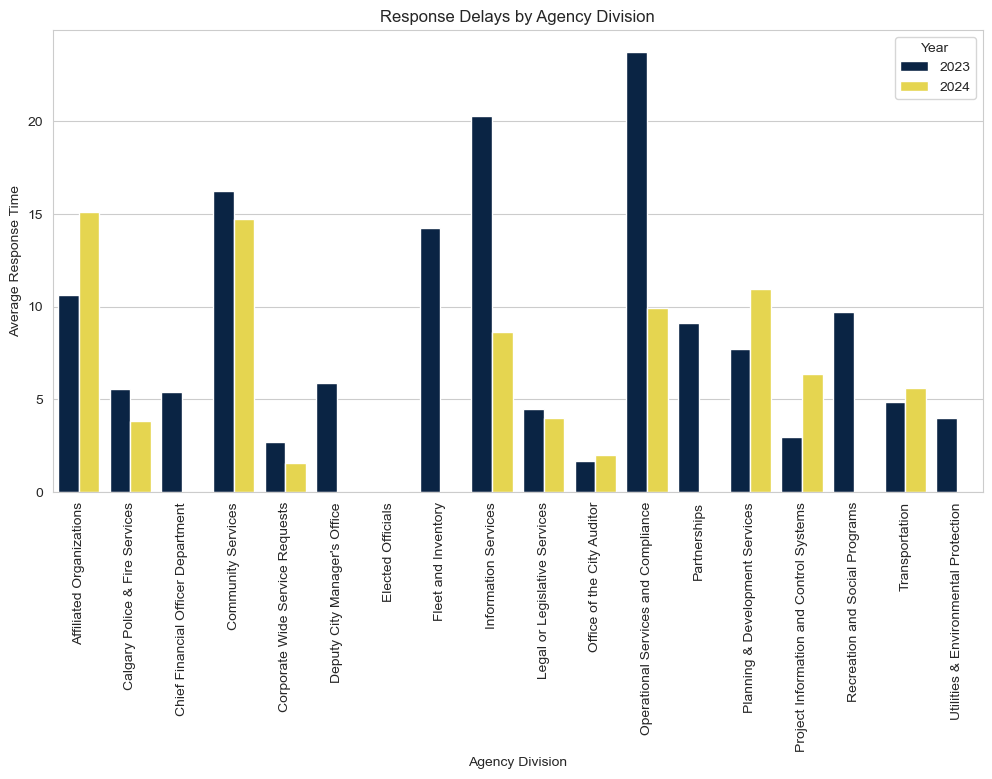

In [121]:
unstacked_df = pivoted_df.unstack()
unstacked_df = unstacked_df.reset_index()
unstacked_df.columns = ['Metric', 'Year', 'Agency Division', 'Value']
request_count_df = unstacked_df[unstacked_df["Metric"] == "request_count"]
response_time_df = unstacked_df[unstacked_df["Metric"] == "average_response_time"]
response_time_complete = response_time_df.dropna()
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(data=response_time_complete, x="Agency Division", y="Value", hue="Year", palette="cividis")
plt.xlabel("Agency Division")
plt.ylabel("Average Response Time")
plt.title("Response Delays by Agency Division")
plt.xticks(rotation=90)
plt.legend(title="Year")
plt.show()

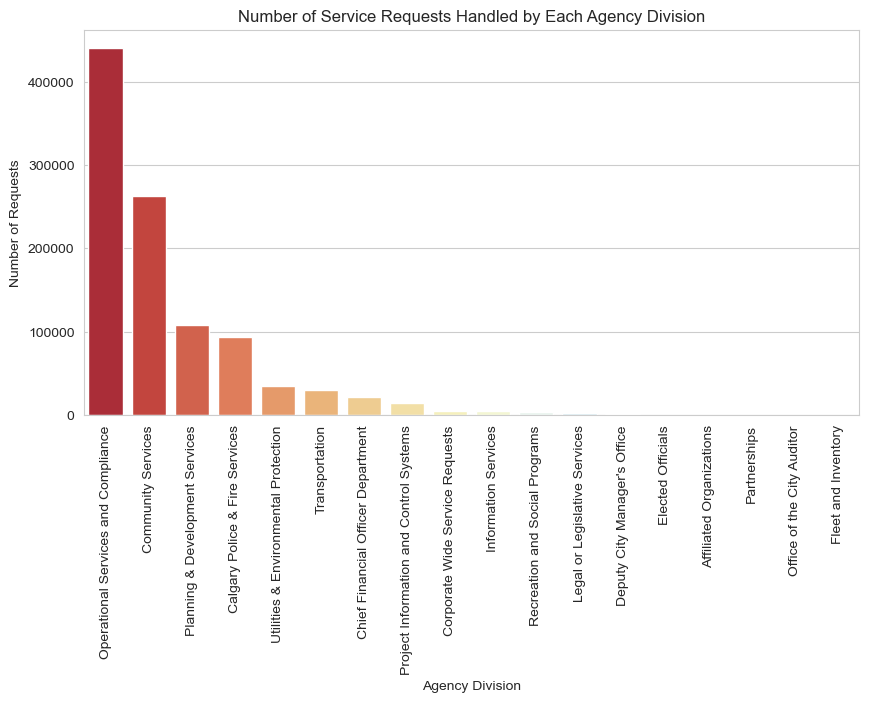

In [122]:
#Identify agencies that handles the most and least number of service requests
plt.figure(figsize=(10, 5))
sns.barplot(x='agency_division', y='count', data=sorted_counts,hue='agency_division',palette='RdYlBu')
plt.xticks(rotation=90)
plt.xlabel("Agency Division")
plt.ylabel("Number of Requests")
plt.title("Number of Service Requests Handled by Each Agency Division")
plt.show()

Average Response Rate: 0.99
Average Response Time in days: 12.63


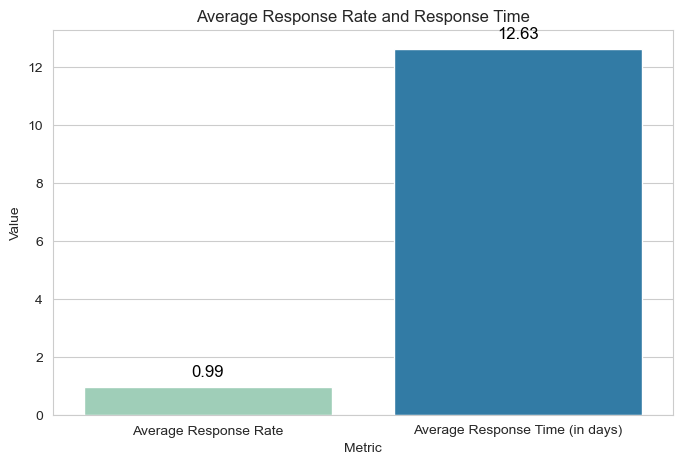

In [123]:
#Average response rate and time for resolving service requests
total_requests = df[df['modified_status'].isin(["Opened", "Duplicate (Open)", "Closed", "Duplicate (Closed)"])]
closed_requests = df[df['modified_status'] == "Closed"]
total_request_count = total_requests['service_request_id'].nunique()
closed_request_count = closed_requests['service_request_id'].nunique()
response_rate = closed_request_count / total_request_count if total_request_count > 0 else 0
print(f"Average Response Rate: {response_rate:.2f}")
avg_response_time_days=df['response_time'].mean()
print(f"Average Response Time in days: {avg_response_time_days:.2f}")
metrics = {'Metric': ['Average Response Rate', 'Average Response Time (in days)'],
           'Value': [response_rate, avg_response_time_days]}

metrics_df = pd.DataFrame(metrics)

plt.figure(figsize=(8, 5))
ax = sns.barplot(x='Metric', y='Value', data=metrics_df,palette='YlGnBu', hue = "Metric")

# Adding data labels
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=12, color='black',
                xytext=(0, 10), textcoords='offset points')

plt.ylabel('Value')
plt.title('Average Response Rate and Response Time')
plt.show()

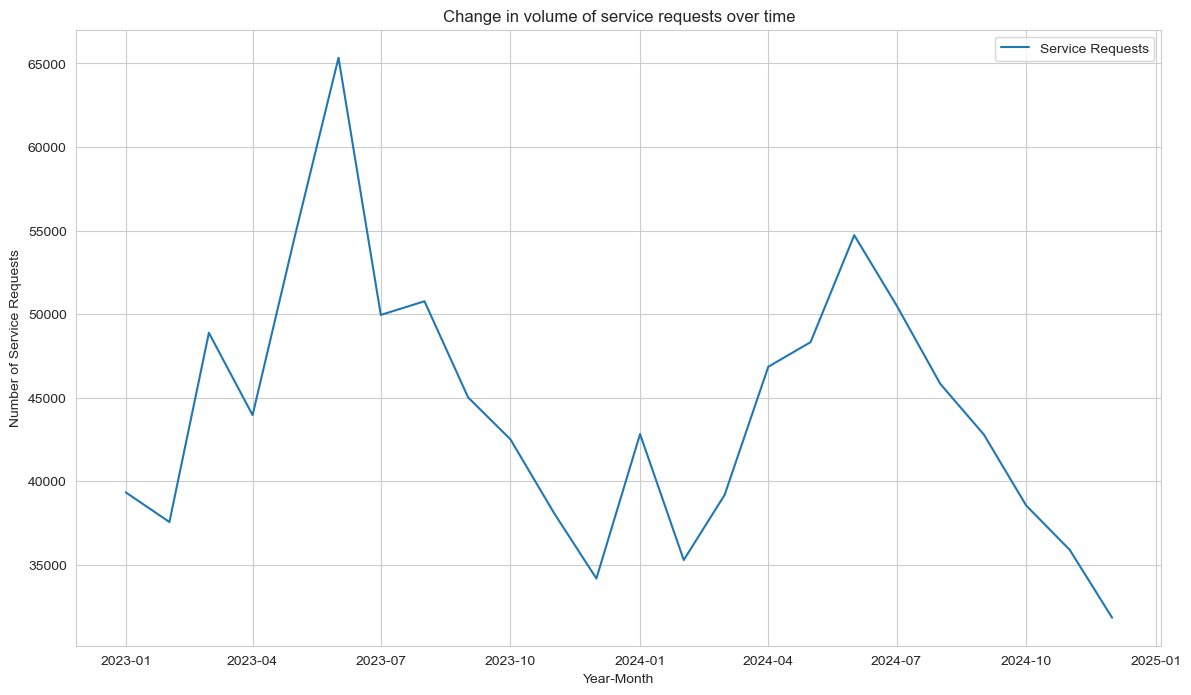

In [124]:
#Trend analysis: volume and type of service requests changed over the past five years

# Group by year_month and count the number of service requests
monthly_requests = df.groupby('year_month').size()

# Convert to a DataFrame and set the index
monthly_requests = monthly_requests.to_timestamp()

# Visualize the historical data
plt.figure(figsize=(14, 8))
plt.plot(monthly_requests, label='Service Requests')
plt.xlabel('Year-Month')
plt.ylabel('Number of Service Requests')
plt.title('Change in volume of service requests over time')
plt.legend()
plt.show()


Unique 311 request sources are:


,count
source,
Email & Social Media,588086
Phone,236463
Mobile App,196755
Web (Online Form),473


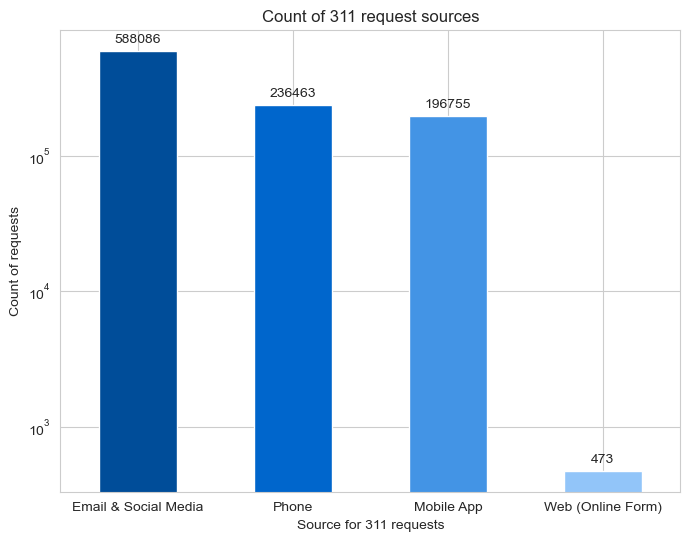

In [125]:
#Request Source Analysis:
# Get the count of each unique value in the 'source' column
source_counts = pd.DataFrame(efficiencyDF['source'].value_counts())
print("Unique 311 request sources are:")
display(source_counts)

# Create a bar chart with a logarithmic scale
plt.figure(figsize=(8, 6))
ax = source_counts['count'].plot(kind='bar', color=['#004D99', '#0066CC', '#4394E5', '#92C5F9'])
plt.xlabel('Source for 311 requests')
plt.ylabel('Count of requests')
plt.title('Count of 311 request sources')
plt.yscale('log')
plt.xticks(rotation=0)
# Add count values on top of the bars
for i in ax.patches:
    ax.annotate(str(i.get_height()), (i.get_x() + i.get_width() / 2, i.get_height()), 
                ha='center', va='center', xytext=(0, 8), textcoords='offset points')
plt.show()


Weekend Requests Volume: 923102
Weekday Requests Volume: 139817
Average Response Time (Weekend): 12.589854034738101 days
Average Response Time (Weekday): 12.89793013944091 days


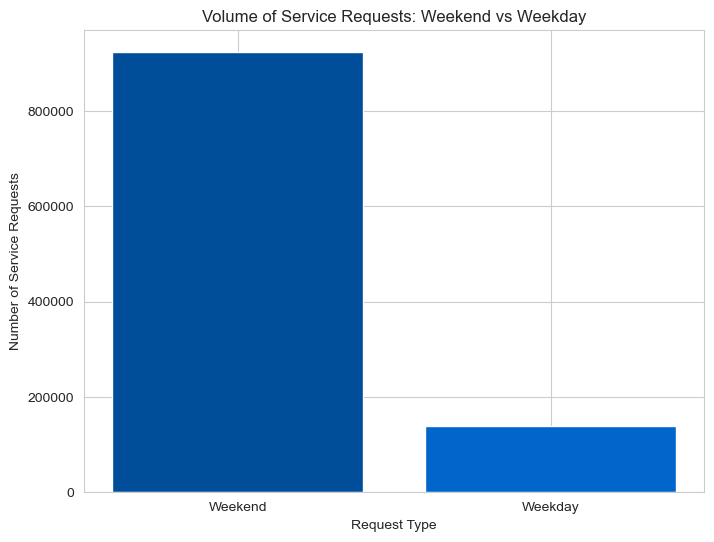

In [126]:
#Weekend Analysis
# Separate weekend and weekday requests
weekend_requests = df[df['is_weekend_request']]
weekday_requests = df[~df['is_weekend_request']]

# Calculate the volume of service requests for weekends and weekdays
weekend_volume = weekend_requests.shape[0]
weekday_volume = weekday_requests.shape[0]

# Calculate the average response time for weekends and weekdays
average_response_time_weekend = weekend_requests['response_time'].mean()
average_response_time_weekday = weekday_requests['response_time'].mean()

# Display the results
print(f'Weekend Requests Volume: {weekend_volume}')
print(f'Weekday Requests Volume: {weekday_volume}')
print(f'Average Response Time (Weekend): {average_response_time_weekend} days')
print(f'Average Response Time (Weekday): {average_response_time_weekday} days')

# Plotting the volume of service requests
volumes = [weekend_volume, weekday_volume]
labels = ['Weekend', 'Weekday']
plt.figure(figsize=(8, 6))
plt.bar(labels, volumes, color=['#004D99', '#0066CC'])
plt.xlabel('Request Type')
plt.ylabel('Number of Service Requests')
plt.title('Volume of Service Requests: Weekend vs Weekday')
plt.show()

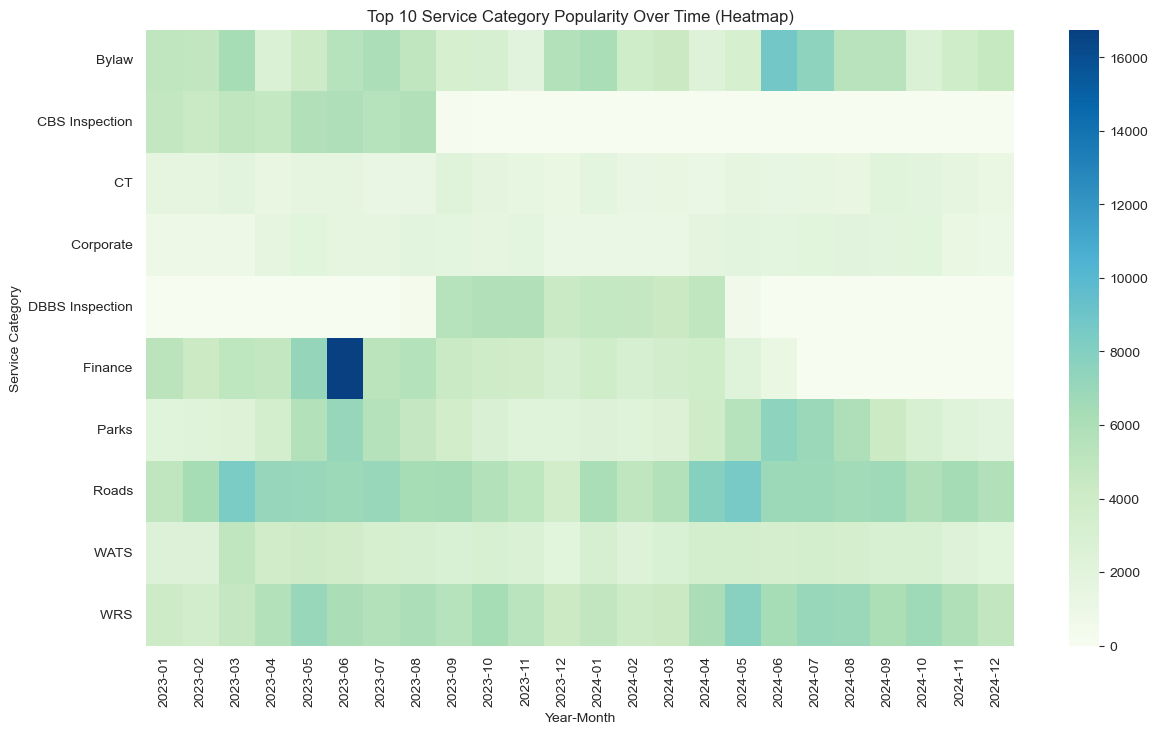

In [127]:
#Service Category Analysis: Service Category Popularity: Identify the most common service categories and how they vary over time.
# Group by year_month and service_category, then count the number of occurrences
service_category_trends = efficiencyDF.groupby(['year_month', 
                                                'service_category']).size().reset_index(name='service_category_count')

# Get the top 10 service categories by total number of requests
top_service_categories = service_category_trends.groupby('service_category')['service_category_count'].sum().nlargest(10).index

# Filter the trends to include only the top 10 service categories
top_service_category_trends = service_category_trends[service_category_trends['service_category'].isin(top_service_categories)]

# Pivot the table to make it easier to plot
top_service_category_trends_pivot = top_service_category_trends.pivot(index='year_month', 
                                                                      columns='service_category', 
                                                                      values='service_category_count').fillna(0)

# Plotting the most common service categories over time as a heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(top_service_category_trends_pivot.T, annot=False, fmt='g', cmap='GnBu')
plt.xlabel('Year-Month')
plt.ylabel('Service Category')
plt.title('Top 10 Service Category Popularity Over Time (Heatmap)')
plt.show()


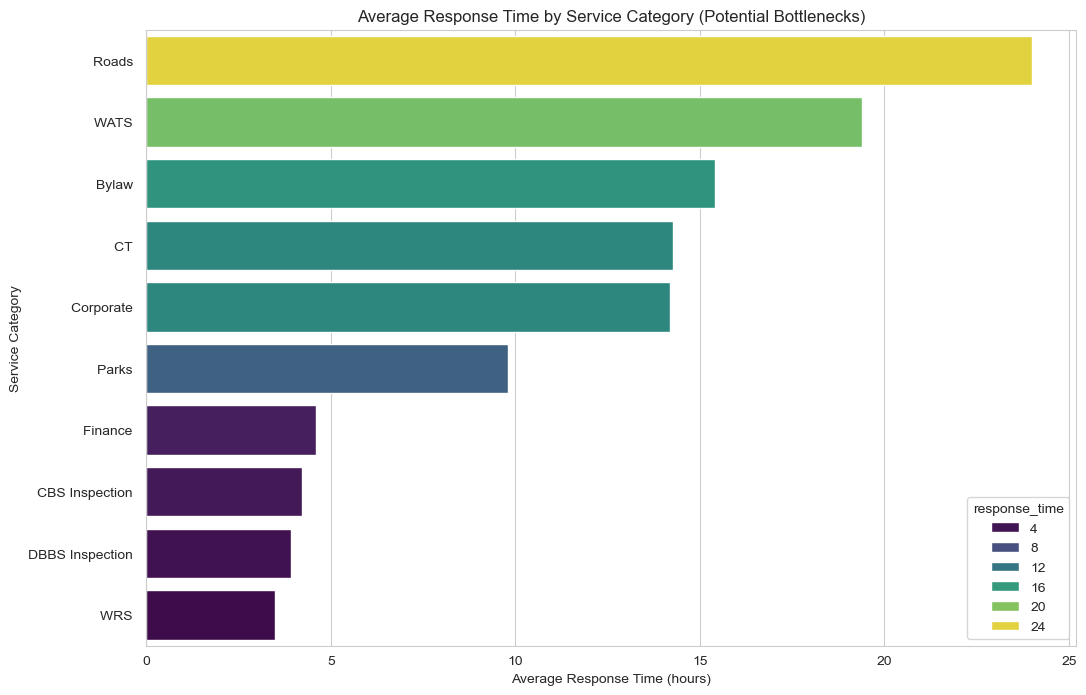

In [128]:
#Efficiency by Service Category: Compare response times across different service categories to identify potential bottlenecks.

# Calculate the total number of requests for each service category
total_requests_by_category = efficiencyDF.groupby('service_category').size().reset_index(name='total_requests')

# Get the top 10 service categories by the number of requests
top_service_categories = total_requests_by_category.nlargest(10, 'total_requests')['service_category']

# Filter the DataFrame to include only the top 10 service categories
top_service_category_df = efficiencyDF[efficiencyDF['service_category'].isin(top_service_categories)]

# Calculate average response time for each of the top 10 service categories
response_time_by_category = top_service_category_df.groupby('service_category')['response_time'].mean().reset_index()

# Identify potential bottlenecks by sorting categories with the highest average response time
response_time_by_category = response_time_by_category.sort_values(by='response_time', ascending=False)

# Plotting the average response time by service category
plt.figure(figsize=(12, 8))
sns.barplot(x='response_time', y='service_category', data=response_time_by_category, palette='viridis', hue ='response_time')
plt.xlabel('Average Response Time (hours)')
plt.ylabel('Service Category')
plt.title('Average Response Time by Service Category (Potential Bottlenecks)')
plt.show()
